# CM4X part II: Upwelling section

## Net shortwave at TOA biases

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import cmocean

In [2]:
import warnings
warnings.filterwarnings("ignore")

### CERES EBAF Observational dataset

https://ceres.larc.nasa.gov/data/

In [3]:
toa_netsw_ds =xr.open_dataset("../../data/plotting_ready/netsw_TOA_biases.nc")

bias_swtoa_CM4Xp25 = toa_netsw_ds["bias_swtoa_CM4Xp25"]
bias_swtoa_CM4Xp25c96 = toa_netsw_ds["bias_swtoa_CM4Xp25c96"]
bias_swtoa_CM4Xp125 = toa_netsw_ds["bias_swtoa_CM4Xp125"]
bias_swtoa_CM40 = toa_netsw_ds["bias_swtoa_CM40"]

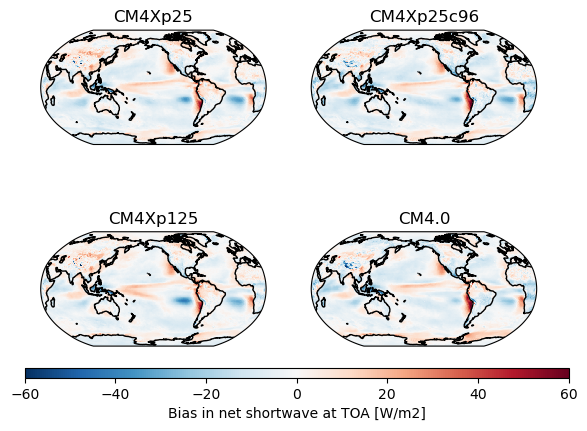

In [4]:
fig, axs = plt.subplots(ncols=2, nrows=2,
                        subplot_kw=dict(projection=ccrs.Robinson(central_longitude=-150)))
C = (bias_swtoa_CM4Xp25).plot(ax=axs[0,0],cmap="RdBu_r",
                              vmin=-60., vmax=60.,
                              transform=ccrs.PlateCarree(),
                              add_colorbar=False)

C = (bias_swtoa_CM4Xp25c96).plot(ax=axs[0,1],cmap="RdBu_r",
                                 vmin=-60., vmax=60.,
                                 transform=ccrs.PlateCarree(),
                                 add_colorbar=False)

C = (bias_swtoa_CM4Xp125).plot(ax=axs[1,0],cmap="RdBu_r",
                               vmin=-60., vmax=60.,
                               transform=ccrs.PlateCarree(),
                               add_colorbar=False)

C = (bias_swtoa_CM40).plot(ax=axs[1,1],cmap="RdBu_r",
                           vmin=-60., vmax=60.,
                           transform=ccrs.PlateCarree(),
                           add_colorbar=False)

axs[0,0].set_title("CM4Xp25")
axs[0,1].set_title("CM4Xp25c96")
axs[1,0].set_title("CM4Xp125")
axs[1,1].set_title("CM4.0")

for ax in axs.flatten():
    ax.coastlines()

axc = fig.add_axes([0.1,0.1,0.85,0.02])
cb = plt.colorbar(C, cax=axc,orientation="horizontal",
                  ticks=[-60,-40,-20,0,20,40,60],
                  shrink=0.9, label="Bias in net shortwave at TOA [W/m2]")
plt.draw()
plt.savefig("../../figures/Net_shortwave_TOA_bias_CERES_EBAF_2001_2014.jpeg", dpi=400,
            facecolor="white", bbox_inches="tight")